# Titanic: Machine Learning from Disaster

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 1. Import libraries and read all files

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

In [93]:
# Read files
gender_submission = pd.read_csv("input/gender_submission.csv")
# Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, the “ground truth”.
train = pd.read_csv("input/train.csv")
# The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.
test = pd.read_csv("input/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Features and Transformations
| categorical        	| numerical         	|
|--------------------	|-------------------	|
| Survived - boolean 	| Age - continuous  	|
| Pclass - ordinal   	| SibSp - discrete  	|
| Name - nominal       	| Parch  - discrete 	|
| Sex - boolean        	| Fare - continuous 	|
| Ticket - nominal     	|                   	|
| Cabin - nominal     	|                   	|
| Embarked - nominal  	|                   	|


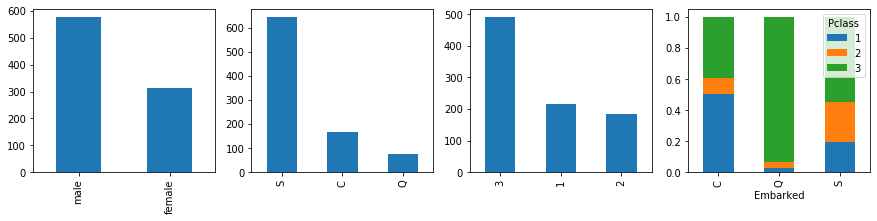

In [37]:
fig, ax = plt.subplots(1,4, figsize=(15,3))

train.Sex.value_counts().plot(kind='bar', ax=ax[0])
train.Embarked.value_counts().plot(kind='bar', ax=ax[1])
train.Pclass.value_counts().plot(kind='bar', ax=ax[2])

df_plot = train.groupby(['Pclass', 'Embarked']).size().reset_index().pivot(columns='Pclass', index='Embarked', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05e5da8390>,
      dtype=object)

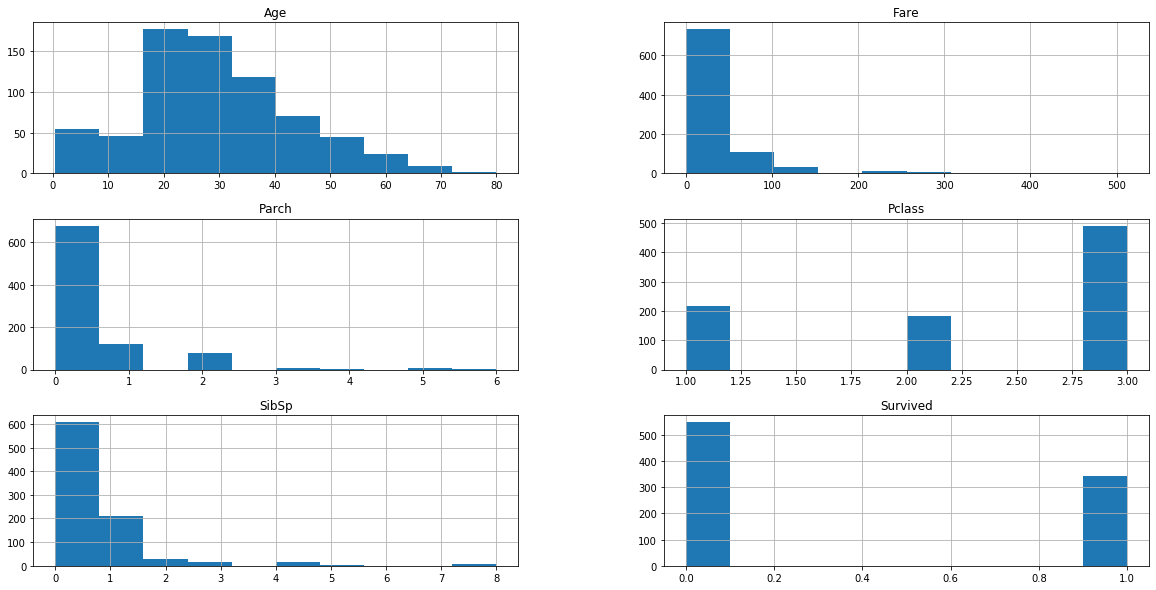

In [14]:
train.drop(['PassengerId'], axis=1).hist(figsize=(20,10))

## features Transformation
Survived - True and False

Pcclass - boolean 
* Pcclass_1
* Pcclass_2
* Pcclass_3

Name - removed for now

Ticket - removed for now

Cabin - removed for now

Embarked - boolean
* Embarked_C
* Embarked_Q
* Embarked_S


In [94]:
pclass_dummies = pd.get_dummies(train.Pclass, prefix = 'Pcclass')
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'Embarked')
sex_dummies = pd.get_dummies(train.Sex, prefix = 'Sex')

train_y = train['Survived']

titanic_train = train.drop(['PassengerId','Name','Ticket','Cabin','Pclass','Embarked','Sex','Survived'], axis=1)
titanic_train["Age"].fillna(train["Age"].mean(), inplace = True)
titanic_train["Fare"].fillna(train["Fare"].mean(), inplace = True)

titanic_train = pd.concat([titanic_train,pclass_dummies,embarked_dummies,sex_dummies], axis=1)
titanic_train.head()

,Age,SibSp,Parch,Fare,Pcclass_1,Pcclass_2,Pcclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [85]:
titanic_train[titanic_train.isna().any(axis=1)]

,Age,SibSp,Parch,Fare,Pcclass_1,Pcclass_2,Pcclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male


In [95]:
reg = LogisticRegression().fit(titanic_train, train_y)
reg.score(titanic_train, train_y)

0.8058361391694725

In [96]:
pclass_dummies = pd.get_dummies(test.Pclass, prefix = 'Pcclass')
embarked_dummies = pd.get_dummies(test.Embarked, prefix = 'Embarked')
sex_dummies = pd.get_dummies(test.Sex, prefix = 'Sex')

titanic_test = test.drop(['PassengerId','Name','Ticket','Cabin','Pclass','Embarked','Sex'], axis=1)
titanic_test["Age"].fillna(train["Age"].mean(), inplace = True)
titanic_test["Fare"].fillna(train["Fare"].mean(), inplace = True)

titanic_test = pd.concat([titanic_test,pclass_dummies,embarked_dummies,sex_dummies], axis=1)
titanic_test

,Age,SibSp,Parch,Fare,Pcclass_1,Pcclass_2,Pcclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.500000,0,0,7.8292,0,0,1,0,1,0,0,1
1,47.000000,1,0,7.0000,0,0,1,0,0,1,1,0
2,62.000000,0,0,9.6875,0,1,0,0,1,0,0,1
3,27.000000,0,0,8.6625,0,0,1,0,0,1,0,1
4,22.000000,1,1,12.2875,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,0,0,8.0500,0,0,1,0,0,1,0,1
414,39.000000,0,0,108.9000,1,0,0,1,0,0,1,0
415,38.500000,0,0,7.2500,0,0,1,0,0,1,0,1
416,29.699118,0,0,8.0500,0,0,1,0,0,1,0,1


In [97]:
titanic_test[titanic_test.isna().any(axis=1)]

,Age,SibSp,Parch,Fare,Pcclass_1,Pcclass_2,Pcclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male


In [100]:
pred = reg.predict(titanic_test)

my_submission = test[['PassengerId']]
my_submission['Survived'] = pred
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [104]:
my_submission.to_csv('output/my_submission.csv', index=False)